Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     506 non-null float64
1     506 non-null float64
2     506 non-null float64
3     506 non-null float64
4     506 non-null float64
5     506 non-null float64
6     506 non-null float64
7     506 non-null float64
8     506 non-null float64
9     506 non-null float64
10    506 non-null float64
11    506 non-null float64
12    506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
bos.columns = boston.feature_names

In [7]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [10]:
bos['PRICE'] = boston.target

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
from sklearn.linear_model import LinearRegression
x = bos.drop('PRICE', axis = 1)

In [13]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lm.fit(x, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 36.45948838509009


In [16]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 13


In [17]:
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


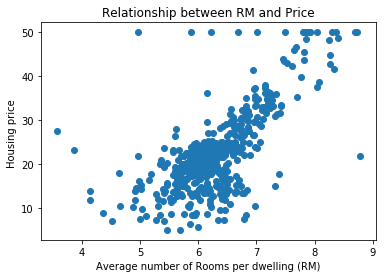

In [18]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel('Average number of Rooms per dwelling (RM)')
plt.ylabel('Housing price ')
plt.title('Relationship between RM and Price')
plt.show()

In [19]:
lm.predict(x)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

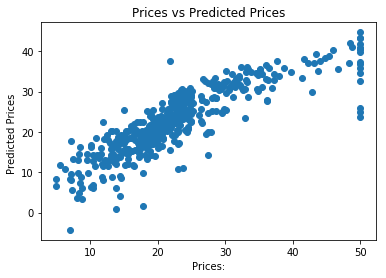

In [20]:
plt.scatter(bos.PRICE, lm.predict(x))
plt.xlabel('Prices:')
plt.ylabel('Predicted Prices ')
plt.title('Prices vs Predicted Prices')
plt.show()

In [21]:
mse = np.mean((bos.PRICE - lm.predict(x))**2)
mse

21.89483118172922

In [23]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='PRICE ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=bos).fit()
print(lm2.pvalues)
print('rsquared', lm2.rsquared)
print(lm2.conf_int())

Intercept    3.283438e-12
CRIM         1.086810e-03
ZN           7.781097e-04
INDUS        7.382881e-01
CHAS         1.925030e-03
NOX          4.245644e-06
RM           1.979441e-18
AGE          9.582293e-01
DIS          6.013491e-13
RAD          5.070529e-06
TAX          1.111637e-03
PTRATIO      1.308835e-12
B            5.728592e-04
LSTAT        7.776912e-23
dtype: float64
rsquared 0.7406426641094095
                   0          1
Intercept  26.432226  46.486751
CRIM       -0.172584  -0.043438
ZN          0.019449   0.073392
INDUS      -0.100268   0.141385
CHAS        0.993904   4.379563
NOX       -25.271634 -10.261589
RM          2.988727   4.631004
AGE        -0.025262   0.026647
DIS        -1.867455  -1.083679
RAD         0.175692   0.436407
TAX        -0.019723  -0.004946
PTRATIO    -1.209795  -0.695699
B           0.004034   0.014589
LSTAT      -0.624404  -0.425113


In [24]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.734    
Dependent Variable: PRICE            AIC:                3025.6086
Date:               2019-04-09 23:49 BIC:                3084.7801
No. Observations:   506              Log-Likelihood:     -1498.8  
Df Model:           13               F-statistic:        108.1    
Df Residuals:       492              Prob (F-statistic): 6.72e-135
R-squared:          0.741            Scale:              22.518   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   36.4595    5.1035    7.1441  0.0000   26.4322   46.4868
CRIM        -0.1080    0.0329   -3.2865  0.0011   -0.1726   -0.0434
ZN           0.0464    0.0137    3.3816  0.0008    0.0194    0.0734
INDUS        0.0206    0.0615    0.3343  0.7383   -0.1003    0.1414
CHAS         2.6867    0.8616    3.1184  0.0019    0.9939    4.3796
NOX        -17.7666    3.8197   -4.6513  0.0000  -25.2716  -10.2616
RM           3.8099    0.4179    9.1161  0.0000    2.9887    4.6310
AGE          0.0007    0.0132    0.0524  0.9582   -0.0253    0.0266
DIS         -1.4756    0.1995   -7.3980  0.0000   -1.8675   -1.0837
RAD          0.3060    0.0663    4.6129  0.0000    0.1757    0.4364
TAX         -0.0123    0.0038   -3.2800  0.0011   -0.0197   -0.0049
PTRATIO     -0.9527    0.1308   -7.2825  0.0000   -1.2098   -0.6957
B            0.0093    0.0027    3.4668  0.0006    0.0040    0.0146
LSTAT       -0.5248    0.0507  -10.3471  0.0000   -0.6244   -0.4251
------------------------------------------------------------------
Omnibus:             178.041       Durbin-Watson:          1.078  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       783.126
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.281         Condition No.:          15114  
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [25]:
lm2_updated = smf.ols(formula='PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT',data=bos).fit()
print(lm2_updated.pvalues)
print('rsquared', lm2_updated.rsquared)
print(lm2_updated.conf_int())

Intercept    2.727265e-12
CRIM         1.010438e-03
ZN           7.542759e-04
CHAS         1.551469e-03
NOX          1.209413e-06
RM           2.889779e-19
DIS          6.837043e-15
RAD          2.996799e-06
TAX          5.214237e-04
PTRATIO      9.235063e-13
B            5.565743e-04
LSTAT        2.140586e-25
dtype: float64
rsquared 0.7405822802569575
                   0          1
Intercept  26.384649  46.297641
CRIM       -0.172818  -0.044009
ZN          0.019276   0.072414
CHAS        1.040325   4.397108
NOX       -24.321990 -10.430057
RM          3.003258   4.599899
DIS        -1.857631  -1.127792
RAD         0.175037   0.424179
TAX        -0.018404  -0.005152
PTRATIO    -1.200110  -0.692939
B           0.004037   0.014544
LSTAT      -0.615732  -0.429375


In [26]:
lm2_updated.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.735    
Dependent Variable: PRICE            AIC:                3021.7264
Date:               2019-04-09 23:52 BIC:                3072.4448
No. Observations:   506              Log-Likelihood:     -1498.9  
Df Model:           11               F-statistic:        128.2    
Df Residuals:       494              Prob (F-statistic): 5.54e-137
R-squared:          0.741            Scale:              22.432   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   36.3411    5.0675    7.1714  0.0000   26.3846   46.2976
CRIM        -0.1084    0.0328   -3.3074  0.0010   -0.1728   -0.0440
ZN           0.0458    0.0135    3.3902  0.0008    0.0193    0.0724
CHAS         2.7187    0.8542    3.1826  0.0016    1.0403    4.3971
NOX        -17.3760    3.5352   -4.9151  0.0000  -24.3220  -10.4301
RM           3.8016    0.4063    9.3562  0.0000    3.0033    4.5999
DIS         -1.4927    0.1857   -8.0370  0.0000   -1.8576   -1.1278
RAD          0.2996    0.0634    4.7255  0.0000    0.1750    0.4242
TAX         -0.0118    0.0034   -3.4925  0.0005   -0.0184   -0.0052
PTRATIO     -0.9465    0.1291   -7.3337  0.0000   -1.2001   -0.6929
B            0.0093    0.0027    3.4746  0.0006    0.0040    0.0145
LSTAT       -0.5226    0.0474  -11.0187  0.0000   -0.6157   -0.4294
------------------------------------------------------------------
Omnibus:             178.430       Durbin-Watson:          1.078  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       787.785
Skew:                1.523         Prob(JB):               0.000  
Kurtosis:            8.300         Condition No.:          14685  
==================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [27]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
x = bos[feature_cols]
y = bos.PRICE

In [28]:
#Train-Test split
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.3,random_state = 0)

In [29]:
x_train.shape

(354, 13)

In [30]:
x_test.shape

(152, 13)

In [31]:
y_train.shape

(354,)

In [32]:
y_test.shape

(152,)

In [33]:
lm3 = LinearRegression()
lm3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
predictions = lm3.predict(x_test)
predictions

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [36]:
lm3.score(x_test,y_test)

0.673382550640018

In [37]:
lm3.intercept_

37.93710774183294

In [38]:
lm3.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

Text(0, 0.5, 'Predictions')

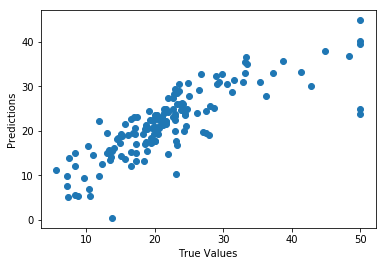

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')